In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from AutoClass import AutoClassImpute,take_norm,find_hv_genes
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
expr_true = pd.read_csv('/Dataset1/truecounts.csv',index_col=0)
cellinfo = pd.read_csv('/Dataset1/cellinfo.csv',index_col=0)

X_true = expr_true.values #Splash generated scRNA-seq data(ground truth data)
Y = cellinfo['Group'].values #cell type label
unique_class = np.unique(Y)
KK = len(unique_class) #number of cell groups
ncell,ngene = X_true.shape[0],X_true.shape[1]
print(ncell,ngene,KK)

500 938 6


Average silhouette width: 0.6


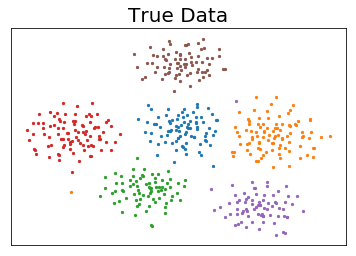

In [3]:
pca_true = PCA(n_components=50).fit_transform(take_norm(X_true))
tsne_true = TSNE(n_components=2).fit_transform(pca_true)
########
label = Y
unique_class=np.unique(Y)
for i in range(KK):
    plt.scatter(tsne_true[label==unique_class[i],0],
                tsne_true[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
    plt.title('True Data',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
asw_true = np.round(silhouette_score(tsne_true,Y),2)
print('Average silhouette width:',asw_true)

#### Gaussian noise

Average silhouette width: -0.02


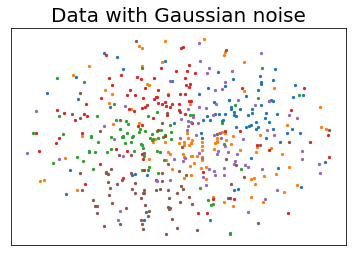

In [4]:
#generate Gaussian noise
noise = np.random.normal(0,6,(ncell,ngene))
noise = noise - np.mean(noise) #zero centered
noise = np.round(noise)
X_g = X_true + noise
X_g[X_g<0] = 0

pca_g = PCA(n_components=50).fit_transform(take_norm(X_g))
tsne_g = TSNE(n_components=2).fit_transform(pca_g)

for i in range(KK):
    plt.scatter(tsne_g[label==unique_class[i],0],
                tsne_g[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
plt.title('Data with Gaussian noise',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
asw_g = np.round(silhouette_score(tsne_g,Y),2)
print('Average silhouette width:',asw_g)

500 cells and 938 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...
n_cluster = 9...
n_cluster = 10...
escape time is: 24.675627946853638


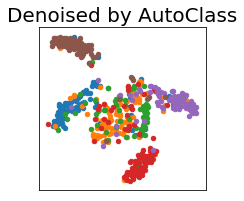

Average silhouette width: 0.19


In [5]:

res = AutoClassImpute(X_g)
imp_auto = (res['imp'])
  
pca_auto = PCA(n_components=50).fit_transform(imp_auto)
tsne_auto = TSNE(n_components=2).fit_transform(pca_auto)
plt.figure(figsize=(3,3))
for i in range(KK):
    plt.scatter(tsne_auto[Y==unique_class[i],0],
                tsne_auto[Y==unique_class[i],1], 
                s=20)
plt.title('Denoised by AutoClass',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
    
plt.show()   
print('Average silhouette width:',np.round(silhouette_score((tsne_auto),Y),2))


#### Uniform noise

Average silhouette width: 0.11


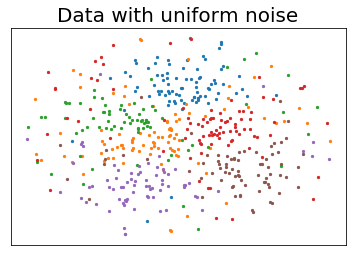

In [8]:
### generate uniform noise
noise = np.random.randint(-8,8,size=(ncell,ngene))
X_u = X_true + noise
X_u[X_u<0] = 0

pca_u = PCA(n_components=50).fit_transform(take_norm(X_u))
tsne_u = TSNE(n_components=2).fit_transform(pca_u)

for i in range(KK):
    plt.scatter(tsne_u[label==unique_class[i],0],
                tsne_u[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
plt.title('Data with uniform noise',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
asw_u = np.round(silhouette_score(tsne_u,Y),2)
print('Average silhouette width:',asw_u)

500 cells and 938 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...
n_cluster = 9...
n_cluster = 10...
escape time is: 31.468168258666992


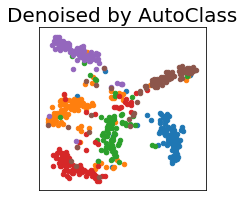

Average silhouette width: 0.33


In [9]:

res = AutoClassImpute(X_u)
imp_auto = (res['imp'])
  
pca_auto = PCA(n_components=50).fit_transform(imp_auto)
tsne_auto = TSNE(n_components=2).fit_transform(pca_auto)
plt.figure(figsize=(3,3))
for i in range(KK):
    plt.scatter(tsne_auto[Y==unique_class[i],0],
                tsne_auto[Y==unique_class[i],1], 
                s=20)
plt.title('Denoised by AutoClass',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
    
plt.show()   
print('Average silhouette width:',np.round(silhouette_score((tsne_auto),Y),2))


#### Gamma noise

Average silhouette width: 0.17


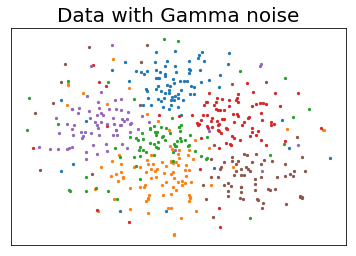

In [10]:
### generate Gamma noise
noise = np.random.randint(0.5,12,(ncell,ngene))
noise = noise - np.mean(noise)
noise = np.round(noise)
X_gamma = X_true + noise
X_gamma[X_gamma<0] = 0
pca_gamma = PCA(n_components=50).fit_transform(take_norm(X_gamma))
tsne_gamma = TSNE(n_components=2).fit_transform(pca_gamma)

for i in range(KK):
    plt.scatter(tsne_gamma[label==unique_class[i],0],
                tsne_gamma[label==unique_class[i],1], 
                s=5,label = unique_class[i] )
plt.title('Data with Gamma noise',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
asw_gamma = np.round(silhouette_score(tsne_gamma,Y),2)
print('Average silhouette width:',asw_gamma)

500 cells and 938 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...
n_cluster = 9...
n_cluster = 10...
escape time is: 42.51891589164734


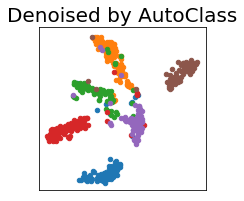

Average silhouette width: 0.49


In [11]:

res = AutoClassImpute(X_gamma)
imp_auto = (res['imp'])
  
pca_auto = PCA(n_components=50).fit_transform(imp_auto)
tsne_auto = TSNE(n_components=2).fit_transform(pca_auto)
plt.figure(figsize=(3,3))
for i in range(KK):
    plt.scatter(tsne_auto[Y==unique_class[i],0],
                tsne_auto[Y==unique_class[i],1], 
                s=20)
plt.title('Denoised by AutoClass',fontsize=20)

plt.xticks([], [])
plt.yticks([], [])
    
plt.show()   
print('Average silhouette width:',np.round(silhouette_score((tsne_auto),Y),2))
